<a href="https://www.kaggle.com/code/eavprog/abscur-pairs-ret-avg?scriptVersionId=219319530" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Средние доходности для парных валютных курсов**

См. страницу на сайте 


# Диапазоны

In [1]:
import pandas as pd

# Получение сегодняшней даты и вычисление дат в прошлом
today = pd.Timestamp.now().normalize()

days_ago_7 = today - pd.Timedelta(days=7)
month_ago = today - pd.DateOffset(months=1)
quarter_ago = today - pd.DateOffset(months=3)
half_year_ago = today - pd.DateOffset(months=6)
year_ago = today - pd.DateOffset(years=1)
two_years_ago = today - pd.DateOffset(years=2)
three_years_ago = today - pd.DateOffset(years=3)
five_years_ago = today - pd.DateOffset(years=5)
ten_years_ago = today - pd.DateOffset(years=10)

# Создание списка диапазонов и их расшифровок
date_ranges = [
    [month_ago, today, "месяц","1m"],
    [quarter_ago, today, "квартал","1q"],
    [half_year_ago, today, "полгода","y2"],
    [year_ago, today, "год","1y"],
    [two_years_ago, today, "два года","2y"],
    [three_years_ago, today, "три года","3y"],
    [five_years_ago, today, "пять лет","5y"],
    [ten_years_ago, today, "десять лет","10y"]
]

ago_dates = {item[2] : item[0] for item in date_ranges}
period_suffix = {item[2] : item[3] for item in date_ranges}

# Загрузка парных курсов

In [2]:
all_pairs = pd.read_csv('/kaggle/input/abscur2/pairs_close.csv',index_col='Date')
all_pairs.index = pd.to_datetime(all_pairs.index)
all_pairs

,AUDHKD,AUDJPY,AUDSEK,AUDUSD,CADJPY,CADSEK,CHFAUD,CHFHKD,CHFJPY,EURAUD,...,USDRUB,USDSAR,USDSEK,USDSGD,USDTHB,USDTRY,USDTWD,USDUAH,USDVND,USDZAR
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-25,6.1381,92.46000,6.5820,0.78759,94.200,6.6635,1.39890,8.5918,133.09000,1.41341,...,64.48500,3.7580,8.36040,1.34649,32.54,2.36296,31.343,15.49700,21320.0,11.45010
2015-01-26,6.1381,93.87030,6.5820,0.79221,94.959,6.6635,1.39890,8.5918,131.45000,1.41980,...,67.81000,3.7580,8.29077,1.34349,32.54,2.35601,31.318,15.34900,21320.0,11.45010
2015-01-27,6.1434,93.26150,6.4844,0.79214,94.990,6.5965,1.39650,8.5869,130.97819,1.43480,...,67.95500,3.7595,8.18620,1.33931,32.50,2.36314,31.233,15.34900,21320.0,11.56770
2015-01-28,6.1105,92.78060,6.5450,0.78927,93.873,6.6244,1.39990,8.5583,129.62970,1.42960,...,67.91500,3.7585,8.29740,1.35365,32.55,2.38692,31.321,15.65400,21320.0,11.57310
2015-01-29,6.0205,92.01400,6.4182,0.77821,93.728,6.5469,1.39380,8.4014,128.16110,1.45620,...,68.73500,3.7575,8.26040,1.35271,32.76,2.41549,31.502,15.64300,21275.0,11.54670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-20,4.8795,97.50200,6.9115,0.62810,108.536,7.6914,1.75558,8.5805,171.32201,1.65892,...,100.99718,3.7490,11.00340,1.35494,34.07,35.58010,32.316,41.84862,25315.0,18.51491
2025-01-21,4.8817,97.52800,6.8840,0.62620,108.602,7.6576,1.75920,8.5966,171.78207,1.66174,...,99.49526,3.7508,10.99279,1.35477,33.95,35.63490,32.584,41.72052,25260.0,18.49340
2025-01-22,4.8839,98.12600,6.8984,0.62750,108.690,7.6506,1.75265,8.5900,172.58832,1.65913,...,99.24761,3.7479,11.00367,1.35512,33.86,35.64470,32.612,41.73474,25050.0,18.46380


# Таблица средних доходностей парных валютных курсов

In [3]:
import pandas as pd

# Создаем пустой DataFrame для хранения результатов
mean_returns = pd.DataFrame()

# Вычисляем средние доходности для каждой валютной пары в заданных диапазонах
for range_name, start_date in ago_dates.items():
    # Определяем конец диапазона как следующий день после последней даты в all_pairs
    end_date = all_pairs.index.max() + pd.Timedelta(days=1)
    
    # Фильтруем данные по диапазону
    filtered_data = all_pairs.loc[start_date:end_date]
    
    # Вычисляем доходности (относительные изменения)
    returns = filtered_data.pct_change() * 100  # Умножаем на 100 для получения в процентах
    
    # Вычисляем средние значения доходностей
    mean_returns[range_name] = returns.mean()

# Настройки отображения для вывода всех строк и столбцов
pd.set_option('display.max_rows', None)  # Выводить все строки
pd.set_option('display.max_columns', None)  # Выводить все столбцы

# Форматируем вывод до 4 знаков после запятой
mean_returns = mean_returns.round(4)

# Выводим результат
mean_returns

,месяц,квартал,полгода,год,два года,три года,пять лет,десять лет
AUDHKD,0.0679,-0.0545,-0.0240,-0.0131,-0.0187,-0.0109,-0.0029,-0.0054
AUDJPY,0.0129,-0.0312,-0.0108,0.0059,0.0121,0.0220,0.0204,0.0037
AUDSEK,0.0164,-0.0210,-0.0164,0.0016,-0.0083,0.0056,0.0046,0.0028
AUDUSD,0.0593,-0.0566,-0.0214,-0.0123,-0.0176,-0.0109,-0.0028,-0.0056
CADJPY,-0.0272,-0.0147,-0.0126,-0.0011,0.0190,0.0212,0.0192,0.0061
CADSEK,-0.0308,-0.0062,-0.0170,-0.0060,-0.0012,0.0051,0.0041,0.0055
CHFAUD,-0.0935,0.0004,0.0079,-0.0012,0.0226,0.0161,0.0108,0.0086
CHFHKD,-0.0201,-0.0530,-0.0165,-0.0154,0.0026,0.0032,0.0056,0.0010
CHFJPY,-0.0783,-0.0283,-0.0076,0.0043,0.0330,0.0362,0.0285,0.0097
EURAUD,-0.0302,0.0219,0.0018,0.0034,0.0139,0.0066,0.0028,0.0063


# Рейтинги средних доходностей парных валютных курсов

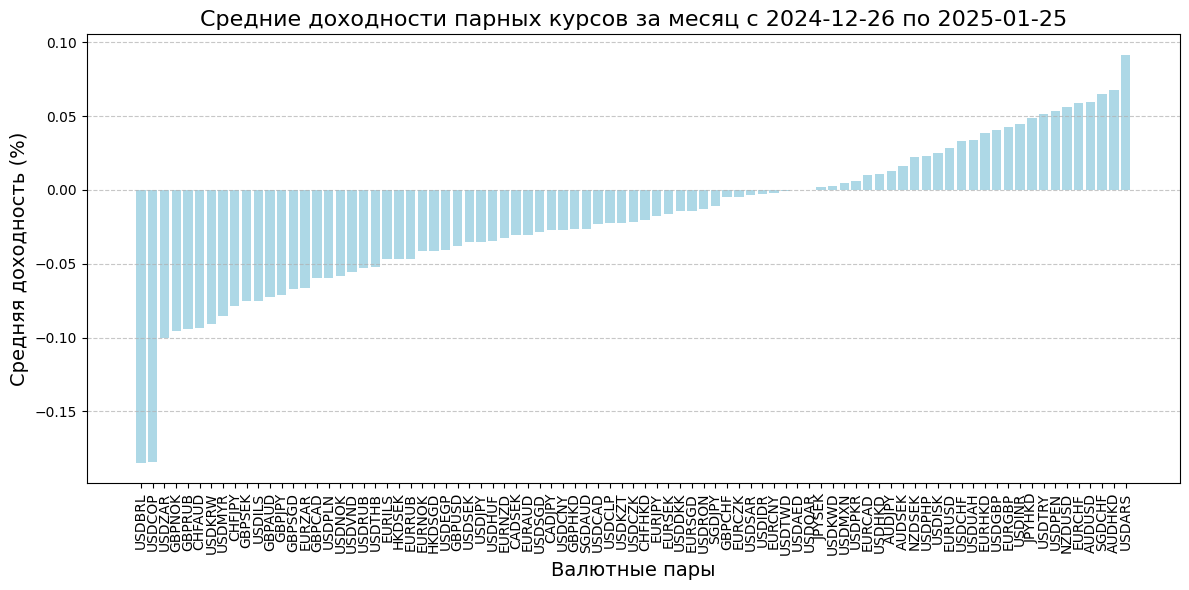

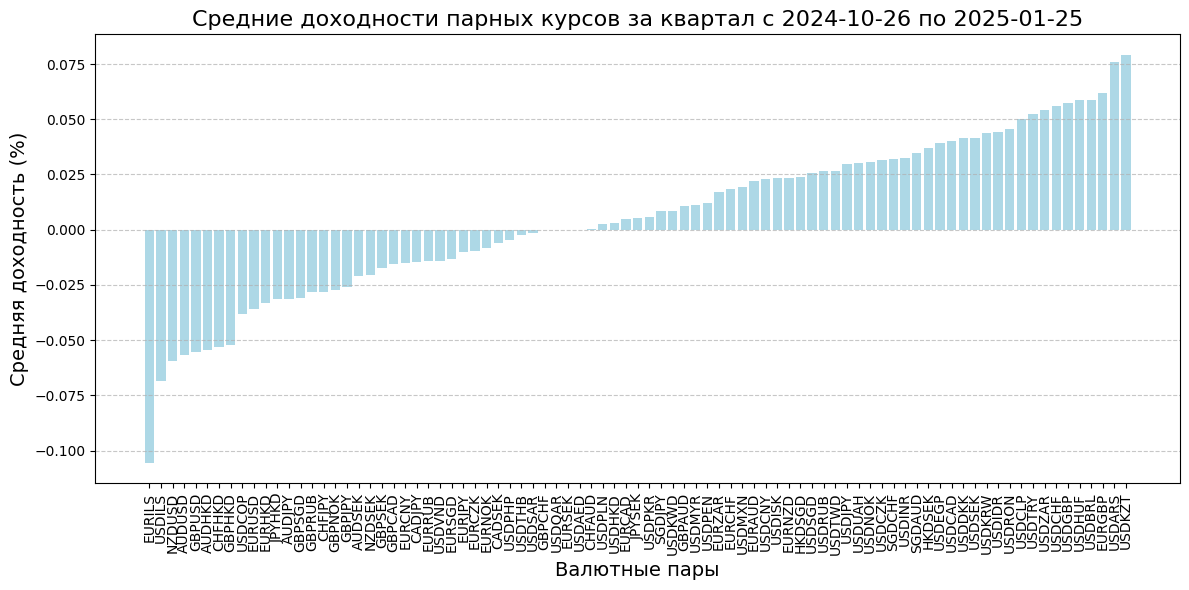

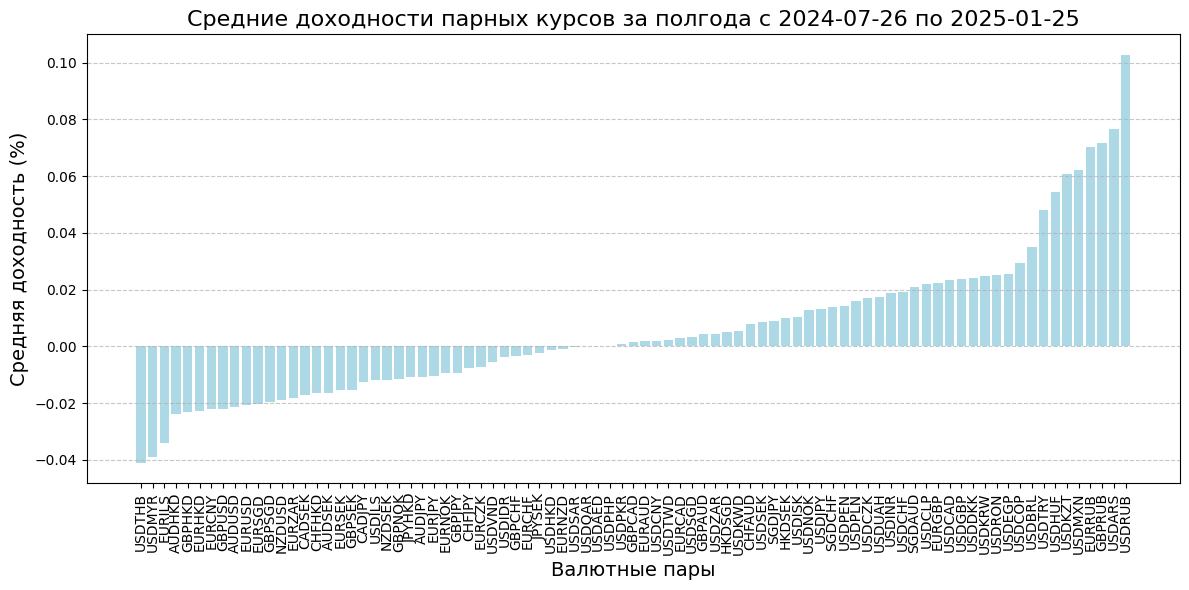

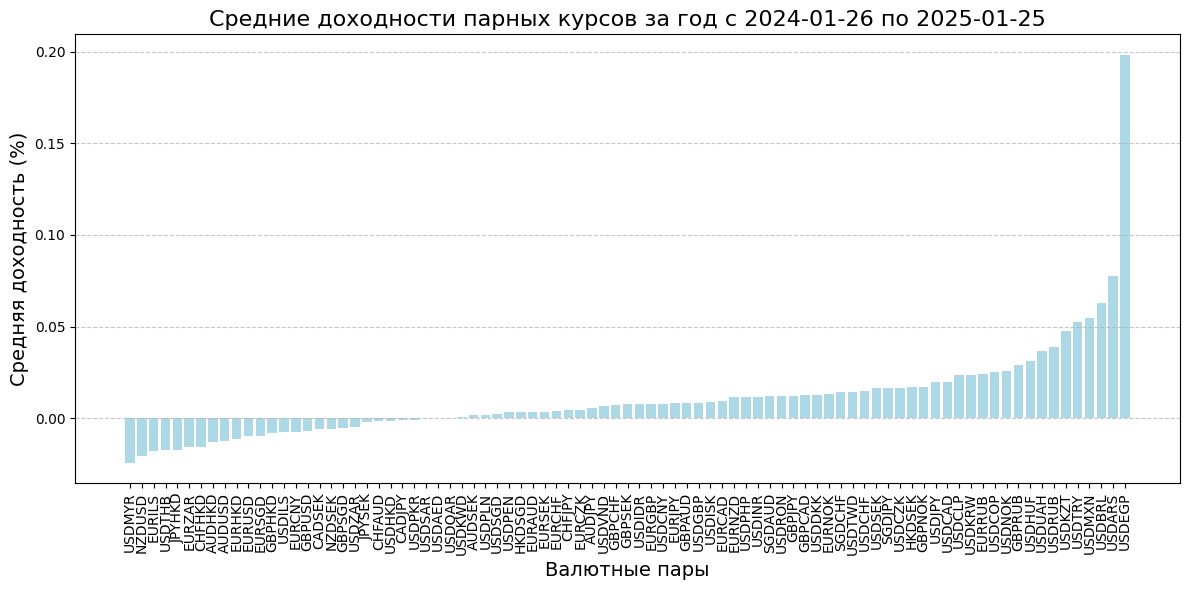

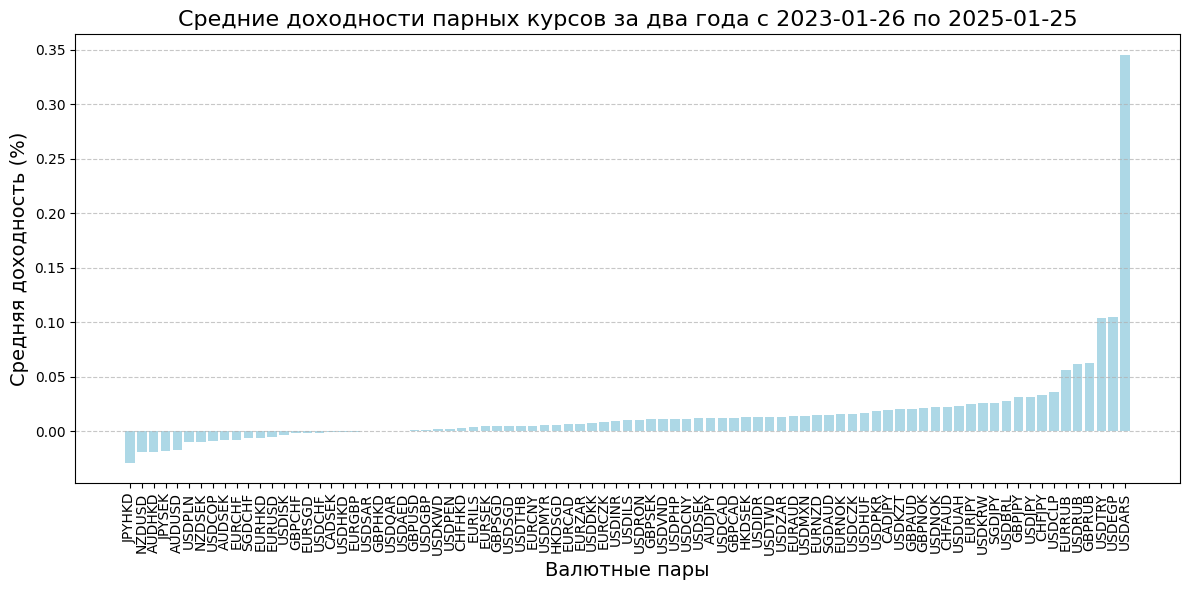

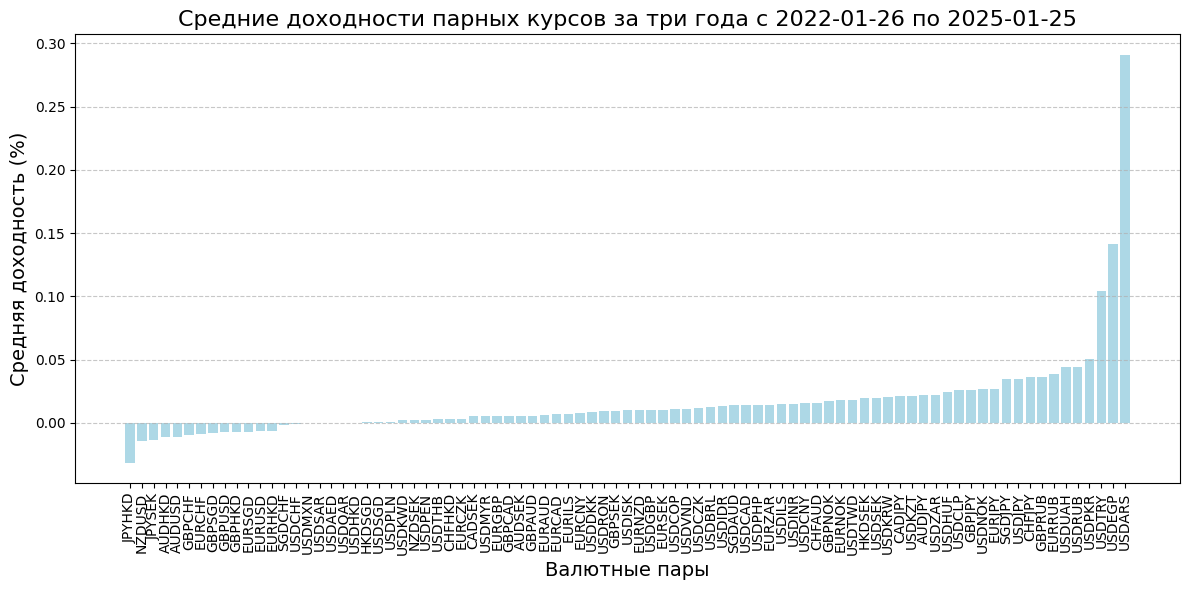

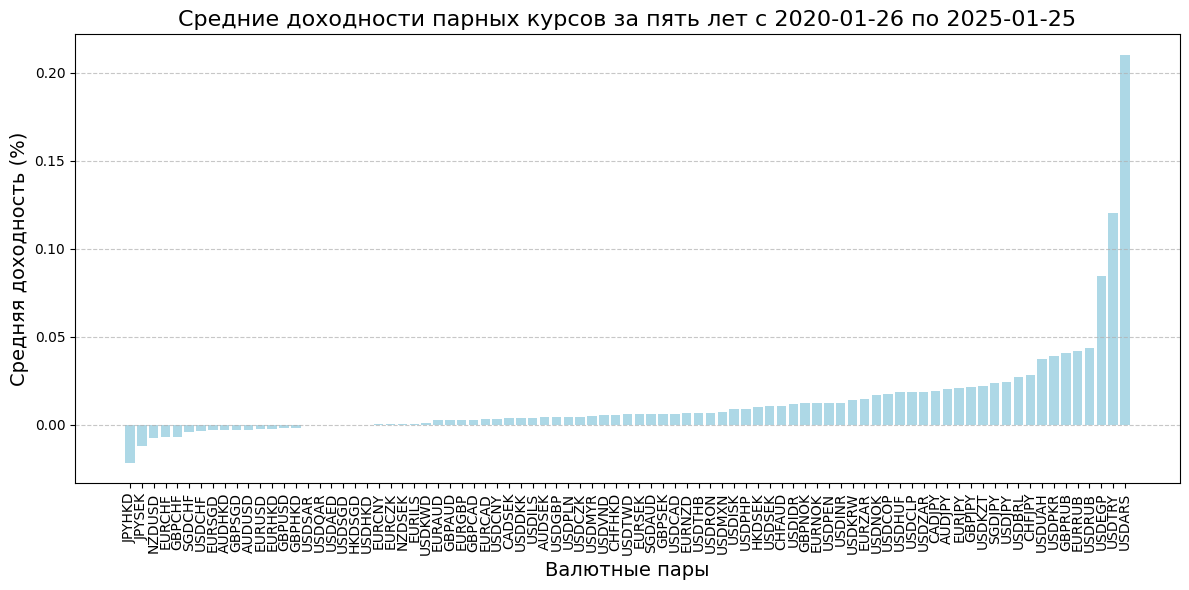

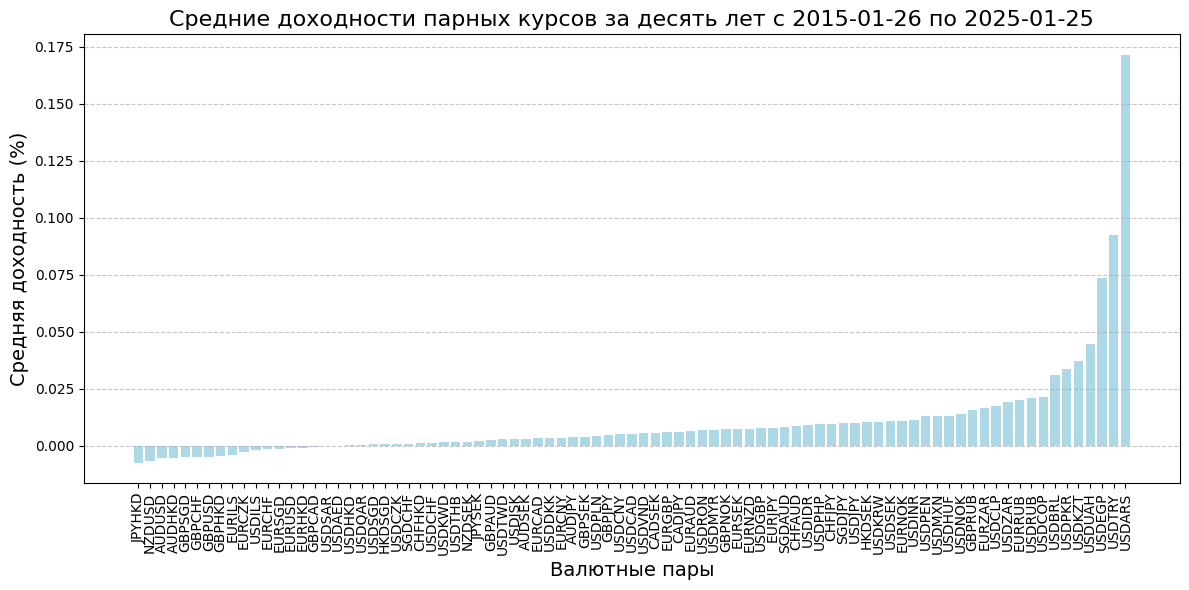

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Генерация столбчатых диаграмм для каждого диапазона средних доходностей
for range_name in mean_returns.columns:  # Цикл по колонкам (диапазонам)
    plt.figure(figsize=(12, 6))
    
    # Сортируем значения по возрастанию
    sorted_values = mean_returns[range_name].sort_values()
    
    # Создаем столбчатую диаграмму
    plt.bar(sorted_values.index, sorted_values.values, color='lightblue')
    
    # Определяем границы диапазона
    start_date = ago_dates[range_name]
    end_date = all_pairs.index.max() + pd.Timedelta(days=1)  # Конец диапазона
    
    # Настройки графика с границами диапазонов в заголовке
    plt.title(f'Средние доходности парных курсов за {range_name} с {start_date.date()} по {end_date.date()}', fontsize=16)
    plt.xlabel('Валютные пары', fontsize=14)
    plt.ylabel('Средняя доходность (%)', fontsize=14)
    
    # Поворот меток на оси X на 90 градусов
    plt.xticks(rotation=90)
    
    # Добавляем сетку для удобства чтения графика
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Отображаем график
    plt.tight_layout()
    plt.show()


# Генерация MD кода

In [5]:
import pandas as pd

# Генерация MD-кода для таблицы std_devs
md_table = mean_returns.to_markdown(index=True)

print(md_table)

|        |   месяц |   квартал |   полгода |     год |   два года |   три года |   пять лет |   десять лет |
|:-------|--------:|----------:|----------:|--------:|-----------:|-----------:|-----------:|-------------:|
| AUDHKD |  0.0679 |   -0.0545 |   -0.024  | -0.0131 |    -0.0187 |    -0.0109 |    -0.0029 |      -0.0054 |
| AUDJPY |  0.0129 |   -0.0312 |   -0.0108 |  0.0059 |     0.0121 |     0.022  |     0.0204 |       0.0037 |
| AUDSEK |  0.0164 |   -0.021  |   -0.0164 |  0.0016 |    -0.0083 |     0.0056 |     0.0046 |       0.0028 |
| AUDUSD |  0.0593 |   -0.0566 |   -0.0214 | -0.0123 |    -0.0176 |    -0.0109 |    -0.0028 |      -0.0056 |
| CADJPY | -0.0272 |   -0.0147 |   -0.0126 | -0.0011 |     0.019  |     0.0212 |     0.0192 |       0.0061 |
| CADSEK | -0.0308 |   -0.0062 |   -0.017  | -0.006  |    -0.0012 |     0.0051 |     0.0041 |       0.0055 |
| CHFAUD | -0.0935 |    0.0004 |    0.0079 | -0.0012 |     0.0226 |     0.0161 |     0.0108 |       0.0086 |
| CHFHKD | -0.0201 

# Генерация HTML-кода

In [6]:
import pandas as pd

# Генерация HTML-кода для таблицы std_devs
html_table = mean_returns.to_html(index=True, border=1, justify='right', escape=False)

# Добавление CSS для выравнивания и предотвращения переноса значений в ячейках
html_table = html_table.replace('<table', '<table style="table-layout: fixed; word-wrap: nowrap;"')

html_table = html_table.replace('\n', '')

# Выводим HTML-код
print(html_table)

<table style="table-layout: fixed; word-wrap: nowrap;" border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>месяц</th>      <th>квартал</th>      <th>полгода</th>      <th>год</th>      <th>два года</th>      <th>три года</th>      <th>пять лет</th>      <th>десять лет</th>    </tr>  </thead>  <tbody>    <tr>      <th>AUDHKD</th>      <td>0.0679</td>      <td>-0.0545</td>      <td>-0.0240</td>      <td>-0.0131</td>      <td>-0.0187</td>      <td>-0.0109</td>      <td>-0.0029</td>      <td>-0.0054</td>    </tr>    <tr>      <th>AUDJPY</th>      <td>0.0129</td>      <td>-0.0312</td>      <td>-0.0108</td>      <td>0.0059</td>      <td>0.0121</td>      <td>0.0220</td>      <td>0.0204</td>      <td>0.0037</td>    </tr>    <tr>      <th>AUDSEK</th>      <td>0.0164</td>      <td>-0.0210</td>      <td>-0.0164</td>      <td>0.0016</td>      <td>-0.0083</td>      <td>0.0056</td>      <td>0.0046</td>      <td>0.0028</td>    </tr>    <tr>      <th>AUDUS